In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

function to generate 100 random X and Y points

In [2]:
def gen_data():
    X = []
    y = []
    for i in range(0,100):
        X.append(np.random.uniform(1,0))
        epsilon = np.random.uniform(-0.3,0.3)
        y.append(math.sin(2 * math.pi * X[i]) + epsilon)
    return(X,y)  

mse_loss - to calculate loss

mse_loss_derv - derivative of loss function. it is not multiplied by 2 bcs doesnt affect the answer

gen_thetas - function to generate thetas

In [3]:
def mse_loss(y_cap,y):
    return (y_cap - y)**2

def mse_loss_derv(y_cap,y):
    return ((y_cap - y))

def gen_thetas(M):
    poly = np.random.uniform(-0.5,0.5, M)
    return poly


poly_model - function calculates h(x) = theta[0] + theta[1]x + theta[2]x^2 + theta[3]x^3 .....

poly_model_derv - derivative of poly_model w.r.t theta

In [4]:
def poly_model(x, thetas):
    y_cap = np.sum([(thetas[i])*x**i for i in range(len(thetas))])
    return(y_cap)

def poly_model_derv(x, i):
    return x**i

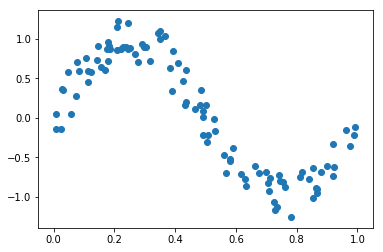

In [17]:
M = 5 #no of thetas
lr = 0.025 #learning rate

X,y = gen_data()

thetas = gen_thetas(M)

plt.scatter(X,y)
plt.show()

prediction - function to predict new Y with newly generated thetas 

In [6]:
def prediction(X,thetas):
    y_predicted = []
    for i in range(100):
        y_predicted.append(poly_model(X[i],thetas))
    return y_predicted

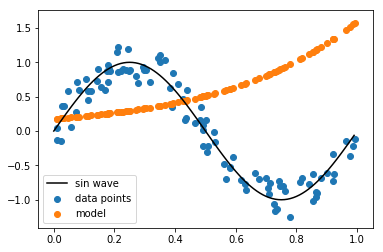

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y, label='data points')

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude,'black', label = 'sin wave')

plt.scatter(X,prediction(X,thetas), label = 'model')
plt.legend()
plt.show()

sgd - stochastic gradient descent

function which approximates thetas with theta[i] = theta[i] -alpha*gradient

where gradient = (y_predicted - y)*derivative of poly model

In [8]:
def sgd(Xg,yg,lr,epochs=5000):
    loss = []
    error = 0
    for k in range(epochs):
        error = 0
        #for 100 iterations
        for i in range(len(Xg)):
            y_cap = poly_model(Xg[i],thetas)
            
            #for thetas
            for j in range(M):
            
                gradient = mse_loss_derv(y_cap,yg[i]) * poly_model_derv(Xg[i],j)
                thetas[j] = thetas[j] - (lr * gradient)
            
            error += mse_loss(y_cap,yg[i])
        loss.append(error/100)
        
    return loss,thetas

In [19]:
l,t = sgd(X,y,lr)

In [20]:
t

array([  0.03192372,   7.43676085, -16.01727907,  -3.32429176,
        12.06887681])

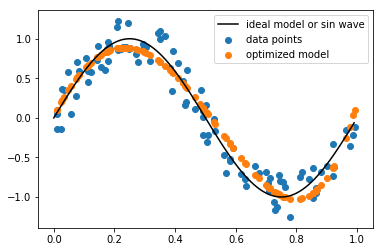

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y, label='data points')

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude, 'black',label='ideal model or sin wave')

y_new = prediction(X,t)
plt.scatter(X,y_new, label='optimized model')
plt.legend()
plt.show()


Error Curve

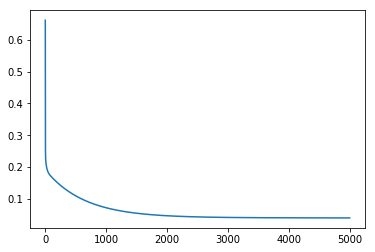

In [22]:
plt.plot(np.arange(5000),l)
plt.show()